In [4]:
from dask import delayed, compute
import dask.bag as db
import dask.array as da

import pandas as pd
import numpy as np
import math
import os

In [5]:
def distance(lat1, lon1, lat2, lon2):
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [6]:
def read_json():

    coordinates = pd.read_json('./Data/workplace.json')
    return coordinates
    

In [14]:
df = read_json()

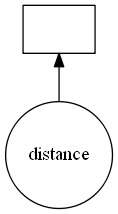

In [8]:
d = delayed(distance)(12.978176 , 77.761382 , 13.022846, 77.614682)
d.visualize()

In [1]:
test_variable = 10

def change_var(test_variable):
    test_variable += 2
    

change_var(test_variable)
print(test_variable)

10


In [29]:
%time
import itertools
test_list = [ 2,3,4,5,6,7,8,9 ,10,11,12  ]

select_indices = [0,5,7]

property_asel = [ test_list[index] for index in select_indices ]
print(property_asel)

Wall time: 0 ns
[2, 7, 9]


In [12]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [15]:
df.head()

,ID,ward,lat,lon
0,56,84,12.978176,77.761382
1,57,32,13.022846,77.614682
2,58,82,12.983696,77.708859
3,59,155,12.950409,77.561229
4,60,133,12.952171,77.538300


In [16]:
df.loc[df.ID == 56]

,ID,ward,lat,lon
0,56,84,12.978176,77.761382


In [20]:
df = df.loc[df.ID == 56 , 'lat' ] = 10

In [22]:
df.iloc[0]

ID      56.000000
ward    84.000000
lat     10.000000
lon     77.761382
Name: 0, dtype: float64

In [28]:
%time
list1 = [0,1,2,3,4,5,6]
list2 = [0,1,2]
list3 = set(list1) - set(list2)
list3

Wall time: 0 ns


{3, 4, 5, 6}

In [16]:
from numba import jit, njit, int64
import numpy as np

In [48]:
@jit(nopython=True)
def test_set_diff():
    
    list1 = [1,2,3,4,5,7]
    list2 = [2,5,4]
    
    possible_list = np.array([i for i in list1 for j in list2 if j != i],dtype=np.float64)
    return np.unique(possible_list) #np.array([ value for value in list1 if value  list2 ],dtype=np.float64)
    


In [49]:
test_set_diff()

array([1., 2., 3., 4., 5., 7.])

In [67]:
@njit
def loop_intersection(lst1, lst2):
    result = []
    for element1 in lst1:
        for element2 in lst2:
            if element1 == element2:
                result.append(element1)
    return result

@njit
def set_intersect():
    list1 = [1,2,3,4,5,7]
    list2 = [2,5,4]
    return list(set(list1).difference(set(list2)))

In [68]:
set_intersect()

[1, 3, 7]

In [3]:
def list_difference(list1, list2):
    diff_list = []
    if len(list1) > len(list2):
        for i in range(len(list1)):
            if i < len(list2):
                if list1[i] != list2[i]:
                    diff_list.append(list2[i])
            else:
                diff_list.append(list1[i])
    return diff_list

In [4]:
list1 = [1,2,3,4,5,7]
list2 = [2,5,4]

list_difference(list1 ,list2)

NameError: name 'list_difference' is not defined

In [5]:
import numpy as np
from numba import jit, int64

@jit(int64[:](int64[:], int64[:]))
def JitListComp(l1, l2):
    l3 = np.array([i for i in l1 for j in l2 if i])
    return np.unique(l3) # and i not in crossSec]

@jit
def CreateList():
    l1 = np.array([1,2,3,4,5,7])
    l2 = np.array([2,5,4])
    return JitListComp(l1, l2)

CreateList()

array([1, 2, 3, 4, 5, 7], dtype=int64)

In [6]:
from numba import njit
@njit
def loop_intersection(lst1, lst2):
    difference_list = []
    difference = set(lst2)
    for value in lst1:
      if value not in difference:
          difference_list.append(value)
    return difference_list

In [7]:
loop_intersection(np.array(list1) ,np.array(list2))

[1, 3, 7]